<a href="https://colab.research.google.com/github/SalmanJubairJim6/ECGR_5105/blob/main/Assignment1_problem2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import files
uploaded = files.upload()

import io
import pandas as pd

data = pd.read_csv(io.BytesIO(uploaded['D3 (4).csv']))

Saving D3.csv to D3 (4).csv


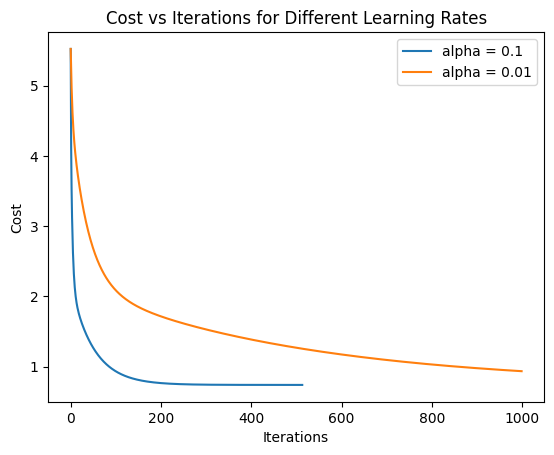

Best learning rate: 0.1
Final model parameters (theta):
theta0 (intercept) = 5.284
theta1 = -1.999
theta2 = 0.538
theta3 = -0.261
Final cost: 0.7385

Predictions for new inputs:
(x1, x2, x3) = (1, 1, 1)  => y = 3.561
(x1, x2, x3) = (2, 0, 4)  => y = 0.24
(x1, x2, x3) = (3, 2, 1)  => y = 0.1


In [7]:
import numpy as np
import matplotlib.pyplot as plt


x1 = data.iloc[:, 0].values
x2 = data.iloc[:, 1].values
x3 = data.iloc[:, 2].values
y  = data.iloc[:, 3].values


X = np.column_stack((np.ones(len(y)), x1, x2, x3))


def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    error = predictions - y
    cost = (1/(2*m)) * np.sum(error ** 2)
    return cost

# Define the gradient descent algorithm.
def gradient_descent_SALMAN(X, y, theta, alpha, num_iters=1000, tol=1e-6):
    m = len(y)
    cost_history = []

    for i in range(num_iters):
        predictions = X.dot(theta)
        error = predictions - y
        cost = (1/(2*m)) * np.sum(error ** 2)
        cost_history.append(cost)

        # Calculate the gradient vector.
        gradient = (1/m) * X.T.dot(error)

        # Update the parameters.
        theta = theta - alpha * gradient

        # Check for convergence: stop if the change in cost is smaller than tolerance.
        if i > 0 and abs(cost_history[-2] - cost) < tol:
            break

    return theta, cost_history

# different learning rates.
learning_rates = [0.1, 0.01]
results = {}

# gradient descent
for alpha in learning_rates:
    theta = np.zeros(X.shape[1])
    theta, cost_history = gradient_descent_SALMAN(X, y, theta, alpha, num_iters=1000)
    results[alpha] = (theta, cost_history)
    plt.plot(cost_history, label=f"alpha = {alpha}")

# Plot
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost vs Iterations for Different Learning Rates")
plt.legend()
plt.show()

# Select the best model based on the lowest final cost.
best_alpha = min(results, key=lambda a: results[a][1][-1])
best_theta, best_cost_history = results[best_alpha]

print(f"Best learning rate: {best_alpha}")
print("Final model parameters (theta):")
print(f"theta0 (intercept) = {best_theta[0]:.3f}")
print(f"theta1 = {best_theta[1]:.3f}")
print(f"theta2 = {best_theta[2]:.3f}")
print(f"theta3 = {best_theta[3]:.3f}")
print(f"Final cost: {best_cost_history[-1]:.4f}")

# Predict y for new values: (1,1,1), (2,0,4), (3,2,1)
new_inputs = np.array([
    [1, 1, 1, 1],
    [1, 2, 0, 4],
    [1, 3, 2, 1]
])
predictions = new_inputs.dot(best_theta)
print("\nPredictions for new inputs:")
print("(x1, x2, x3) = (1, 1, 1)  => y =", round(predictions[0], 3))
print("(x1, x2, x3) = (2, 0, 4)  => y =", round(predictions[1], 3))
print("(x1, x2, x3) = (3, 2, 1)  => y =", round(predictions[2], 3))
